<a href="https://colab.research.google.com/github/wahyunh10/Demand-Forecasting-Public-Bike-Rental-Project/blob/main/Regression_Model_Standardizationipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regression Model: Standardization Technique**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv("cleandata.csv", index_col='datetime', parse_dates=True)
df.head()

,month,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,rentals
datetime,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,1,0,0,1,9.84,14.395,81,0.0,3,13,16
2011-01-01 01:00:00,1,1,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2011-01-01 02:00:00,1,2,1,0,0,1,9.02,13.635,80,0.0,5,27,32
2011-01-01 03:00:00,1,3,1,0,0,1,9.84,14.395,75,0.0,3,10,13
2011-01-01 04:00:00,1,4,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
dummy_season = pd.get_dummies(df.season, prefix='season')
dummy_season.sample(n=10,random_state = 12)

,season_1,season_2,season_3,season_4
datetime,,,,
2012-01-10 12:00:00,1,0,0,0
2011-03-03 16:00:00,1,0,0,0
2011-11-05 16:00:00,0,0,0,1
2012-12-08 17:00:00,0,0,0,1
2011-06-10 17:00:00,0,1,0,0
2011-08-13 09:00:00,0,0,1,0
2012-01-01 12:00:00,1,0,0,0
2012-08-04 05:00:00,0,0,1,0
2011-12-17 16:00:00,0,0,0,1


In [4]:
dummy_weather = pd.get_dummies(df.weather, prefix='weather')
dummy_weather.sample(n=10, random_state = 12)

,weather_1,weather_2,weather_3,weather_4
datetime,,,,
2012-01-10 12:00:00,1,0,0,0
2011-03-03 16:00:00,1,0,0,0
2011-11-05 16:00:00,1,0,0,0
2012-12-08 17:00:00,1,0,0,0
2011-06-10 17:00:00,1,0,0,0
2011-08-13 09:00:00,0,1,0,0
2012-01-01 12:00:00,1,0,0,0
2012-08-04 05:00:00,1,0,0,0
2011-12-17 16:00:00,1,0,0,0


In [5]:
dummy_hour = pd.get_dummies(df.hour, prefix='hour')
dummy_hour.sample(n=10, random_state = 12)

,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
datetime,,,,,,,,,,,,,,,,,,,,,
2012-01-10 12:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-03-03 16:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2011-11-05 16:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2012-12-08 17:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2011-06-10 17:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
2011-08-13 09:00:00,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2012-01-01 12:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2012-08-04 05:00:00,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2011-12-17 16:00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [6]:
df = pd.concat([df, dummy_hour], axis=1)
df = pd.concat([df, dummy_weather], axis=1)
df = pd.concat([df, dummy_season], axis=1)

In [7]:
df.head(10)

,month,hour,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,...,hour_22,hour_23,weather_1,weather_2,weather_3,weather_4,season_1,season_2,season_3,season_4
datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,1,0,0,1,9.84,14.395,81,0.0000,...,0,0,1,0,0,0,1,0,0,0
2011-01-01 01:00:00,1,1,1,0,0,1,9.02,13.635,80,0.0000,...,0,0,1,0,0,0,1,0,0,0
2011-01-01 02:00:00,1,2,1,0,0,1,9.02,13.635,80,0.0000,...,0,0,1,0,0,0,1,0,0,0
2011-01-01 03:00:00,1,3,1,0,0,1,9.84,14.395,75,0.0000,...,0,0,1,0,0,0,1,0,0,0
2011-01-01 04:00:00,1,4,1,0,0,1,9.84,14.395,75,0.0000,...,0,0,1,0,0,0,1,0,0,0
2011-01-01 05:00:00,1,5,1,0,0,2,9.84,12.880,75,6.0032,...,0,0,0,1,0,0,1,0,0,0
2011-01-01 06:00:00,1,6,1,0,0,1,9.02,13.635,80,0.0000,...,0,0,1,0,0,0,1,0,0,0
2011-01-01 07:00:00,1,7,1,0,0,1,8.20,12.880,86,0.0000,...,0,0,1,0,0,0,1,0,0,0
2011-01-01 08:00:00,1,8,1,0,0,1,9.84,14.395,75,0.0000,...,0,0,1,0,0,0,1,0,0,0


In [8]:
df.drop(['hour','season','weather','atemp','casual','registered'], axis = 1, inplace=True)
df.head(20)

,month,holiday,workingday,temp,humidity,windspeed,rentals,hour_0,hour_1,hour_2,...,hour_22,hour_23,weather_1,weather_2,weather_3,weather_4,season_1,season_2,season_3,season_4
datetime,,,,,,,,,,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,9.84,81,0.0000,16,1,0,0,...,0,0,1,0,0,0,1,0,0,0
2011-01-01 01:00:00,1,0,0,9.02,80,0.0000,40,0,1,0,...,0,0,1,0,0,0,1,0,0,0
2011-01-01 02:00:00,1,0,0,9.02,80,0.0000,32,0,0,1,...,0,0,1,0,0,0,1,0,0,0
2011-01-01 03:00:00,1,0,0,9.84,75,0.0000,13,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2011-01-01 04:00:00,1,0,0,9.84,75,0.0000,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2011-01-01 05:00:00,1,0,0,9.84,75,6.0032,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
2011-01-01 06:00:00,1,0,0,9.02,80,0.0000,2,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2011-01-01 07:00:00,1,0,0,8.20,86,0.0000,3,0,0,0,...,0,0,1,0,0,0,1,0,0,0
2011-01-01 08:00:00,1,0,0,9.84,75,0.0000,8,0,0,0,...,0,0,1,0,0,0,1,0,0,0


In [9]:
df.columns

Index(['month', 'holiday', 'workingday', 'temp', 'humidity', 'windspeed',
       'rentals', 'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5',
       'hour_6', 'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'weather_1',
       'weather_2', 'weather_3', 'weather_4', 'season_1', 'season_2',
       'season_3', 'season_4'],
      dtype='object')

In [10]:
X = df[['holiday', 'workingday', 'temp', 'humidity', 'windspeed',
        'hour_0', 'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6',
       'hour_7', 'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12',
       'hour_13', 'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18',
       'hour_19', 'hour_20', 'hour_21', 'hour_22', 'hour_23', 'weather_1',
       'weather_2', 'weather_3', 'weather_4', 'season_1', 'season_2',
       'season_3', 'season_4']]

# **Scaling the variables for preprocessing the data**

In [11]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X) # Standardization

In [12]:
X.columns

Index(['holiday', 'workingday', 'temp', 'humidity', 'windspeed', 'hour_0',
       'hour_1', 'hour_2', 'hour_3', 'hour_4', 'hour_5', 'hour_6', 'hour_7',
       'hour_8', 'hour_9', 'hour_10', 'hour_11', 'hour_12', 'hour_13',
       'hour_14', 'hour_15', 'hour_16', 'hour_17', 'hour_18', 'hour_19',
       'hour_20', 'hour_21', 'hour_22', 'hour_23', 'weather_1', 'weather_2',
       'weather_3', 'weather_4', 'season_1', 'season_2', 'season_3',
       'season_4'],
      dtype='object')

In [13]:
y = df[['rentals']]

# **Create Training & Testing Data Set**

In [14]:
from sklearn import metrics
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled,y, test_size=0.25, random_state=100)

# **More Advance Performance Evaluation Method**

**k-Fold Cross Validation**

In [16]:
from sklearn.model_selection import cross_val_score

In [17]:
maximum_accuracy=0
alpha=0
for i in [float(j) for j in range(0, 50, 1)]:
# for i in range(1, 50, 1):  
    lm = Ridge(alpha = i)
    accuracy = cross_val_score(estimator = lm, X = X_train, y = y_train, cv = 10)
    if accuracy.mean()>maximum_accuracy:
        maximum_accuracy=accuracy.mean()
        alpha=i

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.83118e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.10576e-17): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


**Value of Alpha is =**

In [18]:
print(alpha)

36.0


**Building Ridge Model to Predict**

In [19]:
lm = Ridge(alpha = 41)
lm.fit(X_train, y_train)

Ridge(alpha=41)

In [20]:
print(lm.intercept_)

[176.00202071]


In [21]:
lm.coef_

array([[ -0.59787013,  -2.96049348,  43.66136057, -16.6387936 ,
         -3.20667362, -22.88542682, -26.35244116, -27.87667131,
        -29.30991213, -30.04718881, -26.82148899, -15.7777346 ,
         11.98808837,  26.5221136 ,  11.23528774,  -0.57438231,
          4.67967838,  10.15733035,   8.60394041,   6.89925684,
          9.86568706,  21.76517018,  35.7738494 ,  32.79203008,
         24.21090305,   9.65780375,  -0.90754093,  -7.58207903,
        -15.88101206,   4.72187805,   2.32800536, -12.21888493,
         -0.70745354, -11.7852118 ,   2.95039335,  -4.85145148,
         13.50777003]])

# **Predictions**

In [22]:
predictions = lm.predict(X_test)

In [23]:
predictions

array([[102.56210811],
       [354.03402917],
       [ 10.84859304],
       ...,
       [ 23.74097511],
       [407.30347814],
       [ 63.82441407]])

# **MAE**

In [24]:
metrics.mean_absolute_error(y_test,predictions)

69.78599335043361

# **MSE**

In [25]:
metrics.mean_squared_error(y_test,predictions)

8839.718366872461

# **RMSE**

In [26]:
np.sqrt(metrics.mean_squared_error(y_test,predictions))

94.01977646682883

In [27]:
new_df=y_test.copy()
new_df['pred']=predictions
new_df=new_df.sort_index()

Text(0, 0.5, 'Value of Bike Rental')

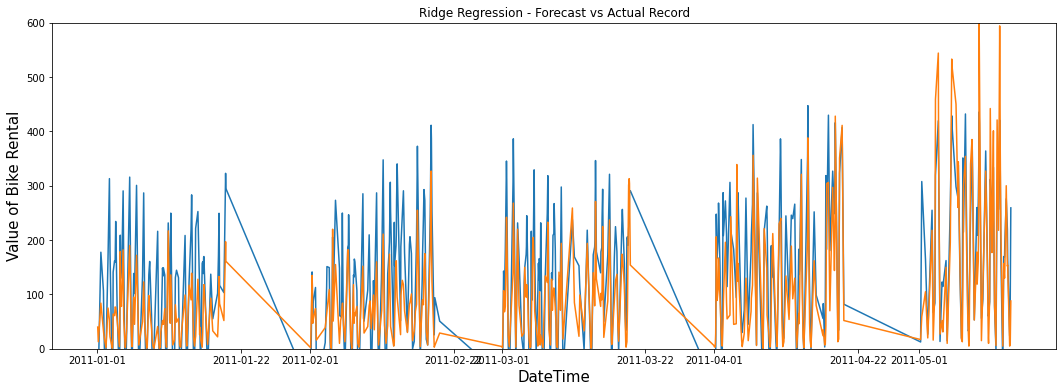

In [28]:
plt.figure(figsize=(18, 6))
plt.plot(new_df['pred'][0:500])
plt.plot(new_df['rentals'][0:500])
plt.ylim(0, 600)
plt.title('Ridge Regression - Forecast vs Actual Record')
plt.xlabel('DateTime',fontsize=15)
plt.ylabel('Value of Bike Rental',fontsize=15)

# **Predictions using RidgeCV Model (Inbuilt Cross Validation Library)**

In [29]:
from sklearn.linear_model import RidgeCV
step1=0.1
clf = RidgeCV(alphas=np.arange(0.1,50,step=step1), cv=10).fit(X_train, y_train)
clf.score(X_train, y_train)

0.6317568102669606

# **Value of Alpha is =**

In [30]:
clf.alpha_

36.300000000000004

In [31]:
y_pred=clf.predict(X_test)
y_pred

array([[102.50788766],
       [354.15895511],
       [ 10.80090382],
       ...,
       [ 23.6547062 ],
       [407.45729926],
       [ 63.72063911]])

In [32]:
metrics.mean_absolute_error(y_test,y_pred)

69.78585630497396

In [33]:
metrics.mean_squared_error(y_test,y_pred)

8839.652832313912

In [34]:
np.sqrt(metrics.mean_squared_error(y_test,y_pred))

94.01942795142881